In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
xtrain, xtest = xtrain/255.0, xtest/255.0
xval, yval = xtrain[50000:], ytrain[50000:]
xtrain, ytrain = xtrain[:50000], ytrain[:50000]

## 1. Testing different activations
### 1.1 Relu

In [4]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
relu_acc, relu_valacc = history.history['accuracy'], history.history['val_accuracy']
relu_loss, relu_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 69us/sample - loss: 1.2976 - accuracy: 0.6326 - val_loss: 0.8870 - val_accuracy: 0.7233
Epoch 2/10
50000/50000 [==============================] - 2s 44us/sample - loss: 0.7866 - accuracy: 0.7445 - val_loss: 0.7171 - val_accuracy: 0.7582
Epoch 3/10
50000/50000 [==============================] - 3s 58us/sample - loss: 0.6714 - accuracy: 0.7785 - val_loss: 0.6450 - val_accuracy: 0.7861
Epoch 4/10
50000/50000 [==============================] - 3s 59us/sample - loss: 0.6111 - accuracy: 0.7988 - val_loss: 0.5982 - val_accuracy: 0.7996
Epoch 5/10
50000/50000 [==============================] - 3s 52us/sample - loss: 0.5720 - accuracy: 0.8114 - val_loss: 0.5954 - val_accuracy: 0.7873
Epoch 6/10
50000/50000 [==============================] - 3s 57us/sample - loss: 0.5442 - accuracy: 0.8194 - val_loss: 0.5419 - val_accuracy: 0.8182
Epoch 7/10
50000/50000 [==============================] 

### 1.2 LeakyRELU

In [5]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
leaky_relu_acc, leaky_relu_valacc = history.history['accuracy'], history.history['val_accuracy']
leaky_relu_loss, leaky_relu_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 80us/sample - loss: 1.2348 - accuracy: 0.6330 - val_loss: 0.8538 - val_accuracy: 0.7213
Epoch 2/10
50000/50000 [==============================] - 3s 51us/sample - loss: 0.7643 - accuracy: 0.7459 - val_loss: 0.6991 - val_accuracy: 0.7625
Epoch 3/10
50000/50000 [==============================] - 3s 61us/sample - loss: 0.6572 - accuracy: 0.7812 - val_loss: 0.6315 - val_accuracy: 0.7883
Epoch 4/10
50000/50000 [==============================] - 3s 58us/sample - loss: 0.6005 - accuracy: 0.8024 - val_loss: 0.5881 - val_accuracy: 0.7994
Epoch 5/10
50000/50000 [==============================] - 3s 59us/sample - loss: 0.5641 - accuracy: 0.8139 - val_loss: 0.5827 - val_accuracy: 0.7931
Epoch 6/10
50000/50000 [==============================] - 2s 50us/sample - loss: 0.5381 - accuracy: 0.8204 - val_loss: 0.5354 - val_accuracy: 0.8179
Epoch 7/10
50000/50000 [==============================] 

### 1.3 Parametric ReLU

In [6]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer='he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(100, kernel_initializer='he_normal'),
    tf.keras.layers.PReLU(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
prelu_acc, prelu_valacc = history.history['accuracy'], history.history['val_accuracy']
prelu_loss, prelu_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 64us/sample - loss: 1.2968 - accuracy: 0.6328 - val_loss: 0.8866 - val_accuracy: 0.7230
Epoch 2/10
50000/50000 [==============================] - 3s 64us/sample - loss: 0.7863 - accuracy: 0.7446 - val_loss: 0.7169 - val_accuracy: 0.7579
Epoch 3/10
50000/50000 [==============================] - 3s 59us/sample - loss: 0.6712 - accuracy: 0.7786 - val_loss: 0.6449 - val_accuracy: 0.7859
Epoch 4/10
50000/50000 [==============================] - 3s 66us/sample - loss: 0.6109 - accuracy: 0.7988 - val_loss: 0.5981 - val_accuracy: 0.7990
Epoch 5/10
50000/50000 [==============================] - 3s 55us/sample - loss: 0.5719 - accuracy: 0.8112 - val_loss: 0.5954 - val_accuracy: 0.7874
Epoch 6/10
50000/50000 [==============================] - 3s 64us/sample - loss: 0.5440 - accuracy: 0.8195 - val_loss: 0.5417 - val_accuracy: 0.8181
Epoch 7/10
50000/50000 [==============================] 

### 1.4 ELU

In [7]:
tf.random.set_seed(42)
np.random.seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation = 'elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation = 'elu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
elu_acc, elu_valacc = history.history['accuracy'], history.history['val_accuracy']
elu_loss, elu_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 77us/sample - loss: 1.0814 - accuracy: 0.6569 - val_loss: 0.7694 - val_accuracy: 0.7409
Epoch 2/10
50000/50000 [==============================] - 3s 60us/sample - loss: 0.6977 - accuracy: 0.7662 - val_loss: 0.6477 - val_accuracy: 0.7762
Epoch 3/10
50000/50000 [==============================] - 3s 55us/sample - loss: 0.6111 - accuracy: 0.7962 - val_loss: 0.5927 - val_accuracy: 0.7961
Epoch 4/10
50000/50000 [==============================] - 3s 58us/sample - loss: 0.5646 - accuracy: 0.8117 - val_loss: 0.5566 - val_accuracy: 0.8050
Epoch 5/10
50000/50000 [==============================] - 2s 47us/sample - loss: 0.5349 - accuracy: 0.8200 - val_loss: 0.5499 - val_accuracy: 0.8013
Epoch 6/10
50000/50000 [==============================] - 3s 56us/sample - loss: 0.5139 - accuracy: 0.8259 - val_loss: 0.5144 - val_accuracy: 0.8198
Epoch 7/10
50000/50000 [==============================] 

### 1.5 SELU

In [8]:
tf.random.set_seed(42)
np.random.seed(42)

pixel_means = xtrain.mean(axis=0, keepdims=True)
pixel_stds = xtrain.std(axis=0, keepdims=True)
xtrain_scaled = (xtrain - pixel_means) / pixel_stds
xval_scaled = (xval - pixel_means) / pixel_stds
xtest_scaled = (xtest - pixel_means) / pixel_stds

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation = 'selu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation = 'selu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain_scaled, ytrain, validation_data = (xval_scaled, yval), epochs = 10, batch_size = 256)
selu_acc, selu_valacc = history.history['accuracy'], history.history['val_accuracy']
selu_loss, selu_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 69us/sample - loss: 0.7438 - accuracy: 0.7509 - val_loss: 0.5591 - val_accuracy: 0.8074
Epoch 2/10
50000/50000 [==============================] - 3s 65us/sample - loss: 0.5066 - accuracy: 0.8252 - val_loss: 0.4985 - val_accuracy: 0.8274
Epoch 3/10
50000/50000 [==============================] - 3s 68us/sample - loss: 0.4564 - accuracy: 0.8421 - val_loss: 0.4688 - val_accuracy: 0.8362
Epoch 4/10
50000/50000 [==============================] - 3s 67us/sample - loss: 0.4276 - accuracy: 0.8521 - val_loss: 0.4460 - val_accuracy: 0.8439
Epoch 5/10
50000/50000 [==============================] - 3s 60us/sample - loss: 0.4082 - accuracy: 0.8577 - val_loss: 0.4395 - val_accuracy: 0.8461
Epoch 6/10
50000/50000 [==============================] - 3s 69us/sample - loss: 0.3935 - accuracy: 0.8628 - val_loss: 0.4253 - val_accuracy: 0.8496
Epoch 7/10
50000/50000 [==============================] 

<AxesSubplot:title={'center':'Validation Accuracy'}>

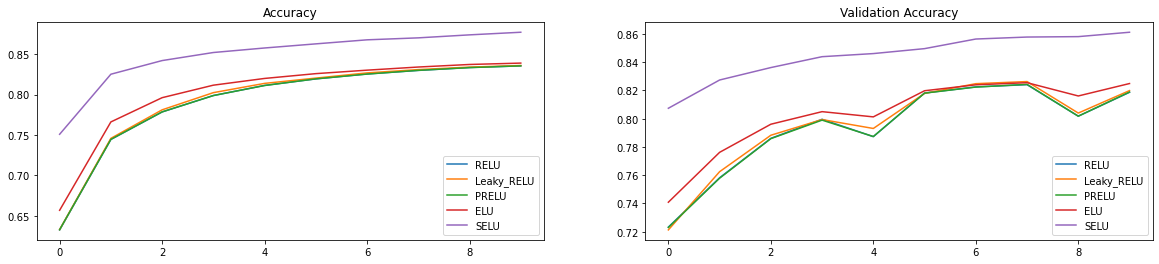

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 4))
plt.subplot(121)
plt.title("Accuracy")
sns.lineplot(np.arange(10), relu_acc, label='RELU')
sns.lineplot(np.arange(10), leaky_relu_acc, label='Leaky_RELU')
sns.lineplot(np.arange(10), prelu_acc, label='PRELU')
sns.lineplot(np.arange(10), elu_acc, label='ELU')
sns.lineplot(np.arange(10), selu_acc, label='SELU')

plt.subplot(122)
plt.title("Validation Accuracy")
sns.lineplot(np.arange(10), relu_valacc, label='RELU')
sns.lineplot(np.arange(10), leaky_relu_valacc, label='Leaky_RELU')
sns.lineplot(np.arange(10), prelu_valacc, label='PRELU')
sns.lineplot(np.arange(10), elu_valacc, label='ELU')
sns.lineplot(np.arange(10), selu_valacc, label='SELU')


## Observations

* Despite running for short epochs, SELU clearly outperforming other variants
* As the usual trend goes, we see SELU > ELU > PRELU, LeakyRelu > RELU

## 2. Batch Normalization

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = 'softmax')    
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
bn_acc, bn_valacc = history.history['accuracy'], history.history['val_accuracy']
bn_loss, bn_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 119us/sample - loss: 0.8322 - accuracy: 0.7251 - val_loss: 0.8040 - val_accuracy: 0.7709
Epoch 2/10
50000/50000 [==============================] - 4s 81us/sample - loss: 0.5372 - accuracy: 0.8168 - val_loss: 0.5270 - val_accuracy: 0.8184
Epoch 3/10
50000/50000 [==============================] - 4s 85us/sample - loss: 0.4763 - accuracy: 0.8331 - val_loss: 0.4731 - val_accuracy: 0.8306
Epoch 4/10
50000/50000 [==============================] - 4s 72us/sample - loss: 0.4406 - accuracy: 0.8465 - val_loss: 0.4496 - val_accuracy: 0.8401
Epoch 5/10
50000/50000 [==============================] - 4s 77us/sample - loss: 0.4171 - accuracy: 0.8544 - val_loss: 0.4330 - val_accuracy: 0.8439
Epoch 6/10
50000/50000 [==============================] - 4s 81us/sample - loss: 0.3985 - accuracy: 0.8609 - val_loss: 0.4198 - val_accuracy: 0.8485
Epoch 7/10
50000/50000 [==============================]

In [11]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

* The number of parameters in batch norm are 4*number of features. 4 corresponding to $\gamma, \beta$ (the scaling and shifting of normalized inputs), $\mu, \sigma$ (moving avg of mean, std dev of training data)

<AxesSubplot:title={'center':'Validation Accuracy'}>

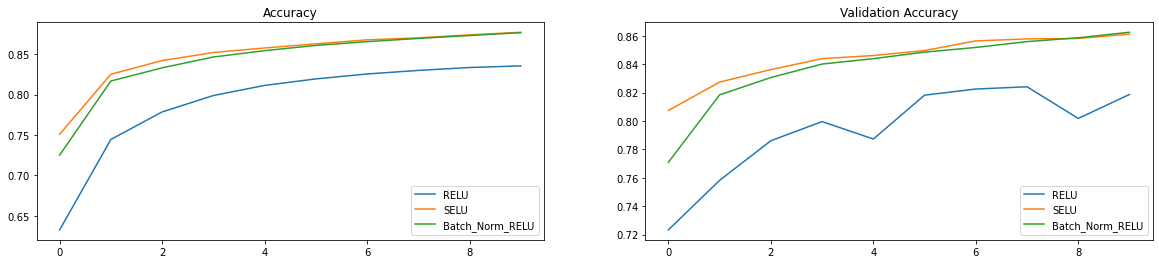

In [12]:
fig = plt.figure(figsize=(20, 4))
plt.subplot(121)
plt.title("Accuracy")
sns.lineplot(np.arange(10), relu_acc, label='RELU')
sns.lineplot(np.arange(10), selu_acc, label='SELU')
sns.lineplot(np.arange(10), bn_acc, label='Batch_Norm_RELU')

plt.subplot(122)
plt.title("Validation Accuracy")
sns.lineplot(np.arange(10), relu_valacc, label='RELU')
sns.lineplot(np.arange(10), selu_valacc, label='SELU')
sns.lineplot(np.arange(10), bn_valacc, label='Batch_Norm_RELU')

### Observations

* SELU and BatchNorm are almost similar performance. They indeed do similar transformation

* If you use SELU it does take care of normalizations and separate BatchNorm layer is not required

In [13]:
### Batch Norm without Bias

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(100, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain, ytrain, validation_data = (xval, yval), epochs = 10, batch_size = 256)
bn1_acc, bn1_valacc = history.history['accuracy'], history.history['val_accuracy']
bn1_loss, bn1_valloss = history.history['loss'], history.history['val_loss']

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 103us/sample - loss: 0.9604 - accuracy: 0.6995 - val_loss: 0.8965 - val_accuracy: 0.7803
Epoch 2/10
50000/50000 [==============================] - 4s 78us/sample - loss: 0.6059 - accuracy: 0.8040 - val_loss: 0.5868 - val_accuracy: 0.8120
Epoch 3/10
50000/50000 [==============================] - 4s 77us/sample - loss: 0.5275 - accuracy: 0.8253 - val_loss: 0.5095 - val_accuracy: 0.8243
Epoch 4/10
50000/50000 [==============================] - 4s 71us/sample - loss: 0.4817 - accuracy: 0.8373 - val_loss: 0.4748 - val_accuracy: 0.8354
Epoch 5/10
50000/50000 [==============================] - 4s 77us/sample - loss: 0.4528 - accuracy: 0.8470 - val_loss: 0.4522 - val_accuracy: 0.8414
Epoch 6/10
50000/50000 [==============================] - 4s 73us/sample - loss: 0.4292 - accuracy: 0.8530 - val_loss: 0.4347 - val_accuracy: 0.8489
Epoch 7/10
50000/50000 [==============================]

<AxesSubplot:title={'center':'Validation Accuracy'}>

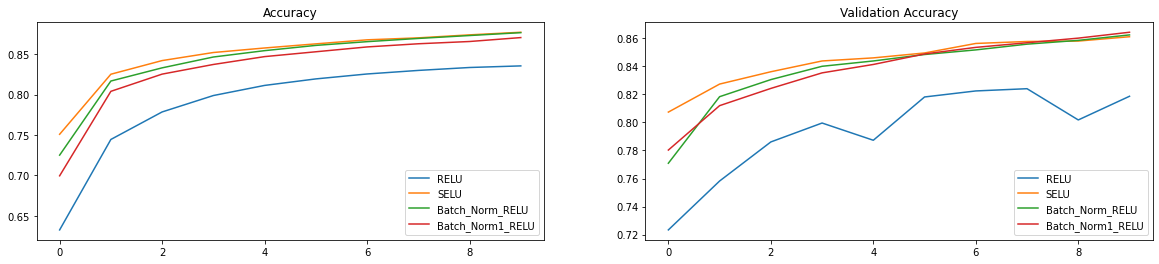

In [14]:
fig = plt.figure(figsize=(20, 4))
plt.subplot(121)
plt.title("Accuracy")
sns.lineplot(np.arange(10), relu_acc, label='RELU')
sns.lineplot(np.arange(10), selu_acc, label='SELU')
sns.lineplot(np.arange(10), bn_acc, label='Batch_Norm_RELU')
sns.lineplot(np.arange(10), bn1_acc, label='Batch_Norm1_RELU')

plt.subplot(122)
plt.title("Validation Accuracy")
sns.lineplot(np.arange(10), relu_valacc, label='RELU')
sns.lineplot(np.arange(10), selu_valacc, label='SELU')
sns.lineplot(np.arange(10), bn_valacc, label='Batch_Norm_RELU')
sns.lineplot(np.arange(10), bn1_valacc, label='Batch_Norm1_RELU')

### Observations

* Using BN before or after activations doesnt seem to yield clearer difference in behavior

## 3. Reusing Save Models

In [15]:
# Create a model to save it before reusing it
## "A" fashion mnist with 8 target class
## "B" 200 items of Sandals and Shirts

def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(xtrain_A, ytrain_A), (xtrain_B, ytrain_B) = split_dataset(xtrain, ytrain)
(xval_A, yval_A), (xval_B, yval_B) = split_dataset(xval, yval)
(xtest_A, ytest_A), (xtest_B, ytest_B) = split_dataset(xtest, ytest)
xtrain_B = xtrain_B[:200]
ytrain_B = ytrain_B[:200]

In [16]:
model_A = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.Dense(8, activation='softmax'),
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain_A, ytrain_A, validation_data = (xval_A, yval_A), epochs = 10, batch_size = 256)

Train on 39966 samples, validate on 8034 samples
Epoch 1/10
39966/39966 [==============================] - 7s 169us/sample - loss: 0.4247 - accuracy: 0.8645 - val_loss: 0.3098 - val_accuracy: 0.8976
Epoch 2/10
39966/39966 [==============================] - 4s 93us/sample - loss: 0.2859 - accuracy: 0.9058 - val_loss: 0.2818 - val_accuracy: 0.9073
Epoch 3/10
39966/39966 [==============================] - 3s 80us/sample - loss: 0.2658 - accuracy: 0.9111 - val_loss: 0.2696 - val_accuracy: 0.9106
Epoch 4/10
39966/39966 [==============================] - 3s 87us/sample - loss: 0.2517 - accuracy: 0.9159 - val_loss: 0.2585 - val_accuracy: 0.9136
Epoch 5/10
39966/39966 [==============================] - 3s 86us/sample - loss: 0.2424 - accuracy: 0.9197 - val_loss: 0.2517 - val_accuracy: 0.9161
Epoch 6/10
39966/39966 [==============================] - 3s 82us/sample - loss: 0.2336 - accuracy: 0.9233 - val_loss: 0.2469 - val_accuracy: 0.9181
Epoch 7/10
39966/39966 [==============================] 

In [17]:
model_A.save("my_model_A.h5")

In [23]:
### Without Transfer Learning
model_B = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    tf.keras.layers.Dense(1, activation='softmax'),
])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')
history = model.fit(xtrain_B, ytrain_B, validation_data = (xval_B, yval_B), epochs = 10, batch_size = 256)
modelB_scratch_acc, modelB_scratch_valacc = history.history['accuracy'], history.history['val_accuracy']
modelB_scratch_loss, modelB_scratch_valloss = history.history['loss'], history.history['val_loss']

Train on 200 samples, validate on 1966 samples
Epoch 1/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.9176 - accuracy: 0.6750 - val_loss: 1.9304 - val_accuracy: 0.5738
Epoch 2/10
200/200 [==============================] - 0s 550us/sample - loss: 0.8115 - accuracy: 0.7100 - val_loss: 1.8428 - val_accuracy: 0.5997
Epoch 3/10
200/200 [==============================] - 0s 520us/sample - loss: 0.7231 - accuracy: 0.7700 - val_loss: 1.7661 - val_accuracy: 0.6272
Epoch 4/10
200/200 [==============================] - 0s 440us/sample - loss: 0.6488 - accuracy: 0.8150 - val_loss: 1.6977 - val_accuracy: 0.6455
Epoch 5/10
200/200 [==============================] - 0s 470us/sample - loss: 0.5851 - accuracy: 0.8300 - val_loss: 1.6366 - val_accuracy: 0.6572
Epoch 6/10
200/200 [==============================] - 0s 510us/sample - loss: 0.5311 - accuracy: 0.8600 - val_loss: 1.5807 - val_accuracy: 0.6663
Epoch 7/10
200/200 [==============================] - 0s 495us/sample - loss: 0

In [24]:
## Transfer Learning

model_A = tf.keras.models.load_model("my_model_A.h5")
model_B_with_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_with_A.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

for layer in model_B_with_A.layers[:-1]:
    layer.trainable = False

model_B_with_A.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')

history = model_B_with_A.fit(xtrain_B, ytrain_B, validation_data = (xval_B, yval_B), epochs = 4, batch_size = 256)

for layer in model_B_with_A.layers[:-1]:
    layer.trainable = True

model_B_with_A.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')

history = model_B_with_A.fit(xtrain_B, ytrain_B, validation_data = (xval_B, yval_B), epochs = 10, batch_size = 256)
modelB_tl_acc, modelB_tl_valacc = history.history['accuracy'], history.history['val_accuracy']
modelB_tl_loss, modelB_tl_valloss = history.history['loss'], history.history['val_loss']

Train on 200 samples, validate on 1966 samples
Epoch 1/4
200/200 [==============================] - 1s 5ms/sample - loss: 0.8935 - accuracy: 0.2950 - val_loss: 0.8759 - val_accuracy: 0.2859
Epoch 2/4
200/200 [==============================] - 0s 495us/sample - loss: 0.8739 - accuracy: 0.2950 - val_loss: 0.8576 - val_accuracy: 0.2940
Epoch 3/4
200/200 [==============================] - 0s 550us/sample - loss: 0.8555 - accuracy: 0.3000 - val_loss: 0.8406 - val_accuracy: 0.3011
Epoch 4/4
200/200 [==============================] - 0s 475us/sample - loss: 0.8383 - accuracy: 0.3050 - val_loss: 0.8246 - val_accuracy: 0.3087
Train on 200 samples, validate on 1966 samples
Epoch 1/10
200/200 [==============================] - 2s 8ms/sample - loss: 0.8222 - accuracy: 0.3200 - val_loss: 0.6258 - val_accuracy: 0.5895
Epoch 2/10
200/200 [==============================] - 0s 550us/sample - loss: 0.6143 - accuracy: 0.6200 - val_loss: 0.5529 - val_accuracy: 0.6633
Epoch 3/10
200/200 [==================

<AxesSubplot:title={'center':'Validation Accuracy'}>

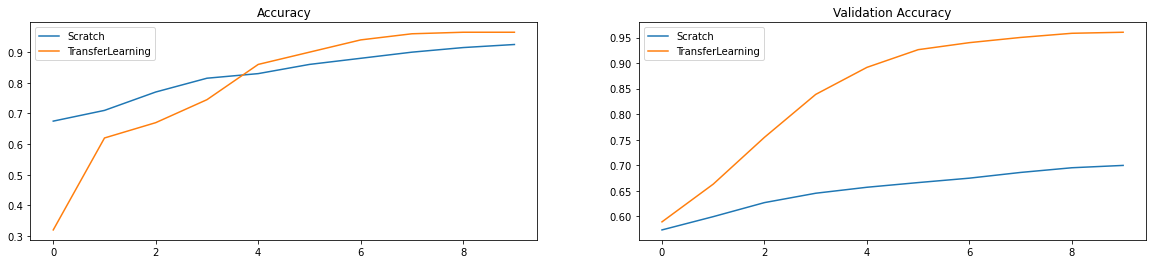

In [25]:
fig = plt.figure(figsize=(20, 4))
plt.subplot(121)
plt.title("Accuracy")
sns.lineplot(np.arange(10), modelB_scratch_acc, label='Scratch')
sns.lineplot(np.arange(10), modelB_tl_acc, label='TransferLearning')

plt.subplot(122)
plt.title("Validation Accuracy")
sns.lineplot(np.arange(10), modelB_scratch_valacc, label='Scratch')
sns.lineplot(np.arange(10), modelB_tl_valacc, label='TransferLearning')

## Observations
* Transfer Learning is effective for larger networks